In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [2]:
datos_finales = pd.read_csv("dataset_limpio.csv")
datos_finales

,UNNAMED: 0_X,AGE,GRUPO_EDAD,JOB,MARITAL,EDUCATION,DEFAULT,HOUSING,LOAN,CONTACT,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,EMP.VAR.RATE,CONS.PRICE.IDX,CONS.CONF.IDX,NR.EMPLOYED,Y,DATE,LATITUDE,LONGITUDE,ID,UNNAMED: 0_Y,INCOME,KIDHOME,TEENHOME,DT_CUSTOMER,NUMWEBVISITSMONTH,TOTAL_KIDS,CUSTOMER_SENIORITY
0,1,57.0,51-65,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,1,999,0,NONEXISTENT,1.1,93.994,-36.4,5191.0,no,2016-09-14,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097,1,85477,1,1,2012-12-30,7,2,4018
1,2,37.0,36-50,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,999,0,NONEXISTENT,1.1,93.994,-36.4,5191.0,no,2019-02-15,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b,2,147233,1,1,2012-02-02,5,2,4350
2,3,40.0,36-50,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,999,0,NONEXISTENT,1.1,93.994,-36.4,5191.0,no,2015-11-29,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e,3,121393,1,2,2012-12-21,29,3,4027
3,4,56.0,51-65,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,999,0,NONEXISTENT,1.1,93.994,-36.4,5191.0,no,2017-01-29,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,4,63164,1,2,2012-06-20,20,3,4211
4,5,45.0,36-50,services,MARRIED,basic.9y,NaN,0.0,0.0,telephone,198,1,999,0,NONEXISTENT,1.1,93.994,-36.4,5191.0,no,2015-09-26,24.689,-101.643,d63ede72-0b6d-45b1-8872-385ac6897f65,5,143854,0,1,2012-01-24,26,1,4359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37434,28721,36.0,36-50,blue-collar,MARRIED,UNKNOWN,0.0,1.0,1.0,cellular,90,1,999,1,FAILURE,-1.8,93.075,-47.1,5099.1,no,2016-08-05,49.310,-93.780,649cf395-b67a-416c-b9ae-3eaf6d3661c5,14077,129333,0,2,2014-04-10,15,2,3552
37435,37852,26.0,26-35,student,SINGLE,high.school,0.0,0.0,0.0,cellular,133,1,999,0,NONEXISTENT,-2.9,92.201,-31.4,5076.2,no,2016-06-01,29.871,-86.270,12d4e85c-39d9-4193-a27d-a58e7af15a43,14078,169378,1,2,2014-12-31,30,3,3287
37436,1120,34.0,26-35,blue-collar,SINGLE,basic.9y,0.0,0.0,0.0,telephone,159,3,999,0,NONEXISTENT,1.1,93.994,-36.4,5191.0,no,2018-04-04,36.430,-95.459,0490dbb9-e21d-4b59-a402-93756e8f17da,14080,159144,1,0,2014-10-14,1,1,3365
37437,3797,30.0,26-35,admin.,MARRIED,university.degree,0.0,1.0,0.0,telephone,355,2,999,0,NONEXISTENT,1.1,93.994,-36.4,5191.0,no,2018-04-10,36.468,-74.361,d9f2c31c-7623-44df-9240-b4514bf21abd,14081,51496,0,0,2014-09-18,12,0,3391


In [ ]:
def analizar_variable_continua(df, columna, nombre_legible):
    df[columna] = pd.to_numeric(df[columna], errors='coerce')

    cuartiles = df[columna].quantile([0, 0.25, 0.5, 0.75, 1.0])
    etiquetas = ['Muy bajo', 'Bajo', 'Alto', 'Muy alto']
    df[f'{columna}_rango'] = pd.cut(df[columna], bins=cuartiles, labels=etiquetas, include_lowest=True)

    conteos = df.groupby(f'{columna}_rango', observed=True)['Y'].value_counts().unstack().fillna(0).astype(int)
    porcentajes = df.groupby(f'{columna}_rango', observed=True)['Y'].value_counts(normalize=True).unstack() * 100

    df_plot = porcentajes.reset_index().melt(id_vars=f'{columna}_rango',value_vars=['yes', 'no'],var_name='Respuesta',value_name='Porcentaje')
    
    print(f"\nRANGOS CUARTILES PARA: {nombre_legible.upper()}")
    for i in range(len(cuartiles) - 1):
        print(f"{etiquetas[i]}: de {cuartiles.iloc[i]:,.2f} a {cuartiles.iloc[i+1]:,.2f}")

    plt.figure(figsize=(8, 5))
    sns.barplot(data=df_plot, x=f'{columna}_rango', y='Porcentaje', hue='Respuesta', palette='viridis')
    plt.title(f'Porcentaje de contrataciones (y) según {nombre_legible}')
    plt.ylabel('% de respuesta')
    plt.xlabel(f'Rango de {nombre_legible}')
    plt.ylim(0, 100)
    plt.legend(title='Respuesta')
    plt.tight_layout()
    plt.show()

    return conteos, porcentajes.round(2)


RANGOS CUARTILES PARA: ANTIGÜEDAD DEL CLIENTE
Muy bajo: de 3,287.00 a 3,573.00
Bajo: de 3,573.00 a 3,970.00
Alto: de 3,970.00 a 4,190.00
Muy alto: de 4,190.00 a 4,382.00


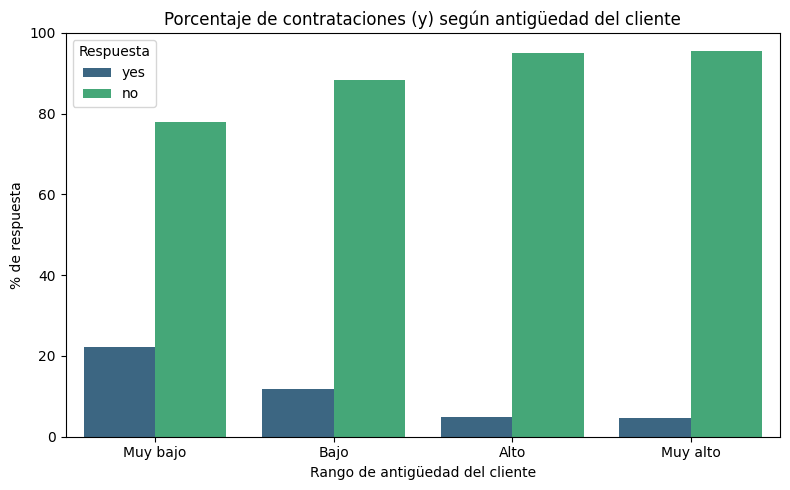

Y                            no    yes
CUSTOMER_SENIORITY_rango              
Muy bajo                  77.87  22.13
Bajo                      88.25  11.75
Alto                      95.04   4.96
Muy alto                  95.45   4.55

RANGOS CUARTILES PARA: INGRESOS DEL CLIENTE
Muy bajo: de 5,841.00 a 49,726.00
Bajo: de 49,726.00 a 93,363.00
Alto: de 93,363.00 a 136,941.50
Muy alto: de 136,941.50 a 180,802.00


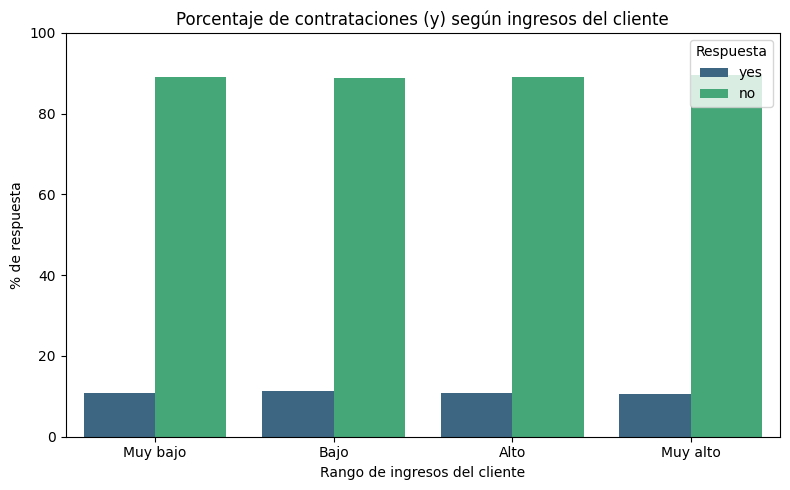

Y                no    yes
INCOME_rango              
Muy bajo      89.18  10.82
Bajo          88.76  11.24
Alto          89.14  10.86
Muy alto      89.51  10.49

RANGOS CUARTILES PARA: NÚMERO DE VISITAS WEB MENSUALES
Muy bajo: de 1.00 a 9.00
Bajo: de 9.00 a 17.00
Alto: de 17.00 a 25.00
Muy alto: de 25.00 a 32.00


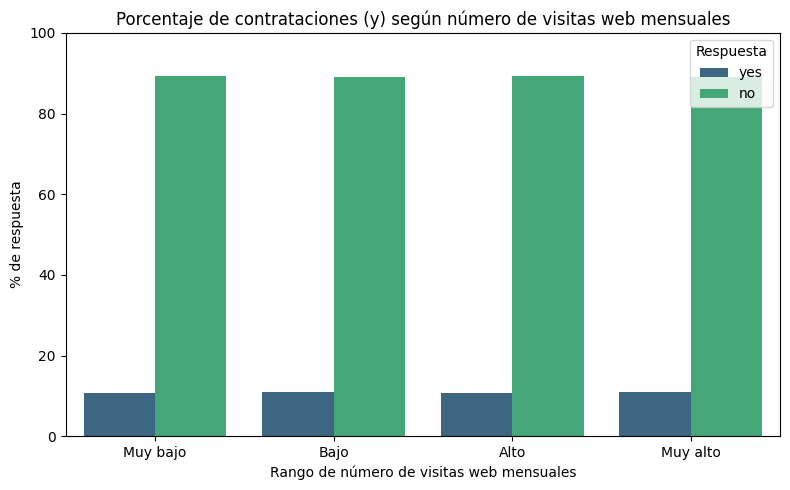

Y                           no    yes
NUMWEBVISITSMONTH_rango              
Muy bajo                 89.18  10.82
Bajo                     89.09  10.91
Alto                     89.32  10.68
Muy alto                 88.97  11.03

RANGOS CUARTILES PARA: DURACIÓN DE LA LLAMADA
Muy bajo: de 0.00 a 102.00
Bajo: de 102.00 a 179.00
Alto: de 179.00 a 319.00
Muy alto: de 319.00 a 4,918.00


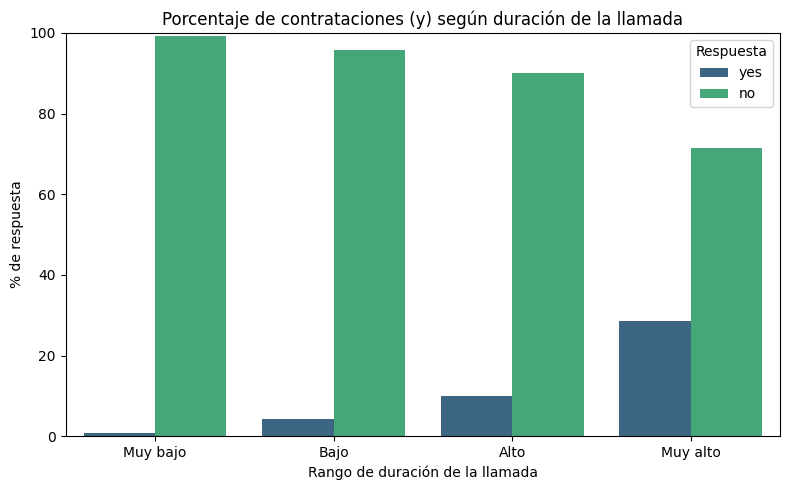

Y                  no    yes
DURATION_rango              
Muy bajo        99.28   0.72
Bajo            95.80   4.20
Alto            90.11   9.89
Muy alto        71.34  28.66

RANGOS CUARTILES PARA: NÚMERO DE NIÑOS
Muy bajo: de 0.00 a 1.00
Bajo: de 1.00 a 2.00
Alto: de 2.00 a 3.00
Muy alto: de 3.00 a 4.00


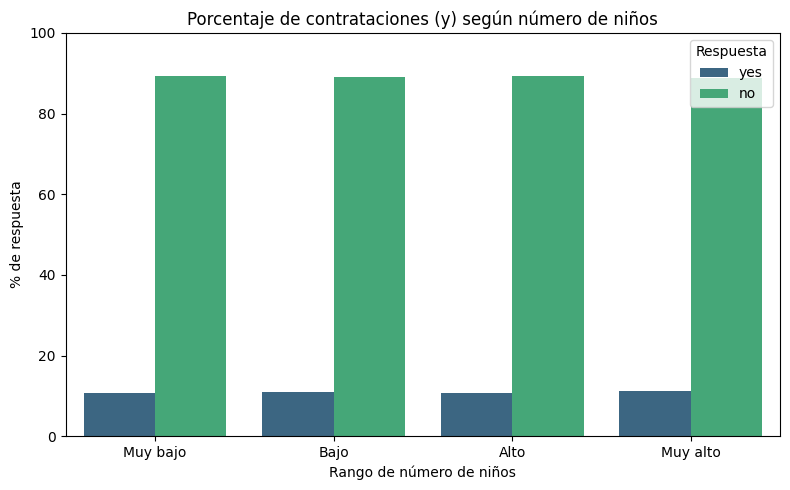

Y                    no    yes
TOTAL_KIDS_rango              
Muy bajo          89.29  10.71
Bajo              89.08  10.92
Alto              89.21  10.79
Muy alto          88.79  11.21


In [4]:
# Analizar Customer_seniority
seniority_conteo, seniority_pct = analizar_variable_continua(datos_finales, 'CUSTOMER_SENIORITY', 'antigüedad del cliente')
print(seniority_pct)

# Analizar Income
income_conteo, income_pct = analizar_variable_continua(datos_finales, 'INCOME', 'ingresos del cliente')
print(income_pct)

# Analizar NumWebVisitsMonth
webvisits_conteo, webvisits_pct = analizar_variable_continua(datos_finales, 'NUMWEBVISITSMONTH', 'número de visitas web mensuales')
print(webvisits_pct)

# Analizar Duration
duration_conteo, duration_pct = analizar_variable_continua(datos_finales, 'DURATION', 'duración de la llamada')
print(duration_pct)

# Anlizar numero total de niños
num_children_conteo, num_children_pct = analizar_variable_continua(datos_finales, 'TOTAL_KIDS', 'número de niños')
print(num_children_pct)


In [11]:
datos_finales['CAMPAIGN'] = pd.to_numeric(datos_finales['CAMPAIGN'], errors='coerce')

In [12]:
bins = [0, 1, 2, 3, datos_finales['CAMPAIGN'].max()]
labels = ['1', '2', '3', '4 o más']
datos_finales['campaign_rango'] = pd.cut(datos_finales['CAMPAIGN'], bins=bins, labels=labels)

In [13]:
# Calcular conteos de 'yes' y 'no' por rango
conteos_campaign = datos_finales.groupby('campaign_rango', observed=True)['Y'].value_counts().unstack().fillna(0).astype(int)

# Calcular porcentajes por rango
porcentajes_campaign = datos_finales.groupby('campaign_rango', observed=True)['Y'].value_counts(normalize=True).unstack() * 100

In [14]:
df_plot = porcentajes_campaign.reset_index().melt(id_vars='campaign_rango',value_vars=['yes', 'no'],var_name='Respuesta',value_name='Porcentaje')

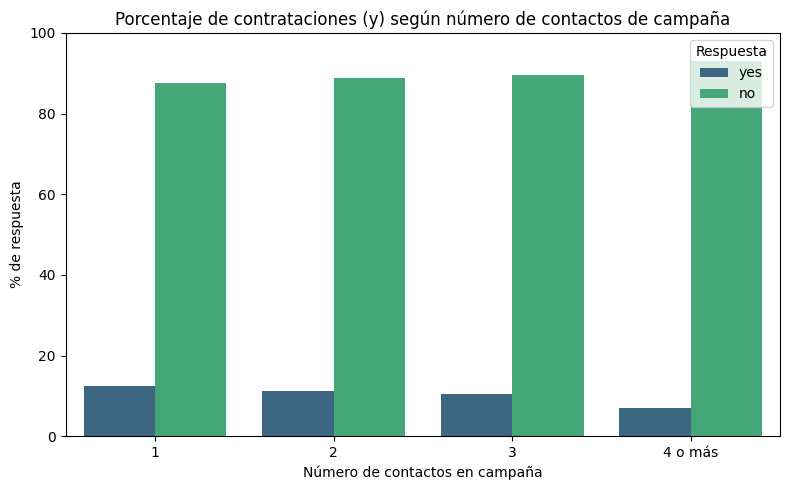


Porcentajes (%):
Y                  no    yes
campaign_rango              
1               87.59  12.41
2               88.81  11.19
3               89.43  10.57
4 o más         92.97   7.03


In [15]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_plot, x='campaign_rango', y='Porcentaje', hue='Respuesta', palette='viridis')
plt.title('Porcentaje de contrataciones (y) según número de contactos de campaña')
plt.ylabel('% de respuesta')
plt.xlabel('Número de contactos en campaña')
plt.ylim(0, 100)
plt.legend(title='Respuesta')
plt.tight_layout()
plt.show()

print("\nPorcentajes (%):")
print(porcentajes_campaign.round(2))

In [ ]:
def extraer_top_perfiles(df, top_n=5):
    variables_perfil = ['CUSTOMER_SENIORITY', 'INCOME', 'NUMWEBVISITSMONTH', 'DURATION', 'TOTAL_KIDS', 'CAMPAIGN']

    df_yes = df[df['Y'] == 'yes']
    total_yes = df_yes.shape[0]
    perfiles_yes = df_yes.groupby(variables_perfil).size().sort_values(ascending=False)
    top_yes = perfiles_yes.head(top_n)
    top_yes_set = set(top_yes.index)

    # Mostrar perfil más común con YES
    perfil_top_yes = top_yes.index[0]
    print("\n Perfil más común con Y = 'yes':")
    for label, valor in zip(variables_perfil, perfil_top_yes):
        print(f"- {label}: {valor}")
    print(f"Frecuencia: {top_yes.values[0]} ({(top_yes.values[0]/total_yes)*100:.2f}%)")

    # Mostrar top 5 con YES
    top_yes_df = top_yes.reset_index()
    top_yes_df.columns = variables_perfil + ['Frecuencia']
    top_yes_df['% sobre total'] = (top_yes_df['Frecuencia'] / total_yes * 100).round(2)

    print(f"\n Top {top_n} perfiles con Y = 'yes':\n")
    print(top_yes_df.to_string(index=False))

    df_no = df[df['Y'] == 'no']
    total_no = df_no.shape[0]
    perfiles_no = df_no.groupby(variables_perfil).size().sort_values(ascending=False)
    perfiles_no_filtrados = perfiles_no[~perfiles_no.index.isin(top_yes_set)]
    top_no = perfiles_no_filtrados.head(top_n)

    # Mostrar perfil más común con NO
    perfil_top_no = top_no.index[0]
    print("\n Perfil más común con Y = 'no':")
    for label, valor in zip(variables_perfil, perfil_top_no):
        print(f"- {label}: {valor}")
    print(f"Frecuencia: {top_no.values[0]} ({(top_no.values[0]/total_no)*100:.2f}%)")

    # Mostrar top 5 con NO
    top_no_df = top_no.reset_index()
    top_no_df.columns = variables_perfil + ['Frecuencia']
    top_no_df['% sobre total'] = (top_no_df['Frecuencia'] / total_no * 100).round(2)

    print(f"\n Top {top_n} perfiles con Y = 'no':\n")
    print(top_no_df.to_string(index=False))

    return top_yes_df, top_no_df

In [17]:
top_yes, top_no_exclusivo = extraer_top_perfiles(datos_finales, top_n=5)


 Perfil más común con Y = 'yes':
- CUSTOMER_SENIORITY: 3287
- INCOME: 41109
- NUMWEBVISITSMONTH: 8
- DURATION: 391
- TOTAL_KIDS: 2
- CAMPAIGN: 1
Frecuencia: 1 (0.02%)

 Top 5 perfiles con Y = 'yes':

 CUSTOMER_SENIORITY  INCOME  NUMWEBVISITSMONTH  DURATION  TOTAL_KIDS  CAMPAIGN  Frecuencia  % sobre total
               3287   41109                  8       391           2         1           1           0.02
               3691  122845                 15      1070           3         1           1           0.02
               3679   49186                 29      1035           3         1           1           0.02
               3679  117759                 18       184           3         4           1           0.02
               3680   43490                  8      1141           1         2           1           0.02

 Perfil más común con Y = 'no':
- CUSTOMER_SENIORITY: 3287
- INCOME: 10323
- NUMWEBVISITSMONTH: 3
- DURATION: 68
- TOTAL_KIDS: 3
- CAMPAIGN: 3
Frecuencia: 1 (0.00